In [11]:
import os

import numpy as np
np.random.seed(12345)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print("Train data size:", train.shape)
print('Test data size:', test.shape)

print('Start data processing', datetime.now())

Train data size: (1460, 81)
Test data size: (1459, 80)
Start data processing 2019-08-20 19:45:21.866446


In [7]:
print(train.head(1))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  

[1 rows x 81 columns]


In [8]:
# 删除标签中的Id数据，因为此数据和房价无关

train.drop(['Id'], axis=1, inplace=True) # inplace=True会原地删除，数据列数-1
test.drop(['Id'], axis=1, inplace=True)

print("Train data size:", train.shape)
print('Test data size:', test.shape)

Train data size: (1460, 80)
Test data size: (1459, 79)


(0, 800000)

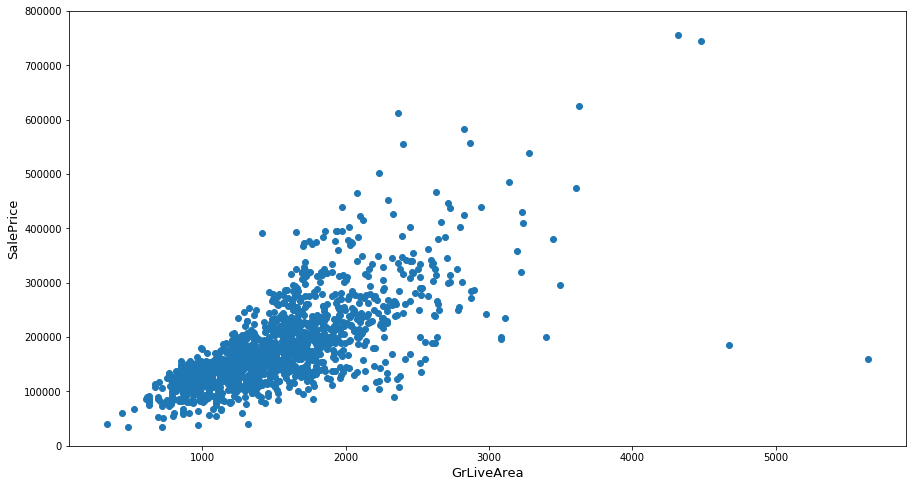

In [16]:
plt.figure(figsize=(15, 8))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLiveArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0, 800000)

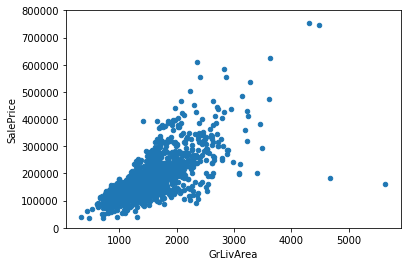

In [19]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

In [22]:
# 去掉一些在分布上表现异常的元素，并重排
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)

print(train.shape)

(1456, 80)


In [26]:
train['SalePrice'] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)

train_feature = train.drop(['SalePrice'], axis=1)
test_features = test

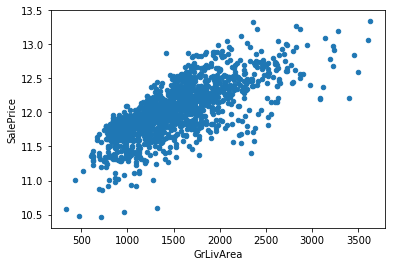

In [36]:
# 经过log（1+x）处理后的数据分布更均匀
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

In [35]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)
print('New feature map size', features.shape)

New feature map size (2915, 79)
